In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib
import pylab as plt
import hallgerd
from hallgerd.core import Sequential, cross_entropy_delta
from hallgerd.layers import Dense
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255

x_test = x_test.T
x_train = x_train.T
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train = y_train.T
y_test = y_test.T

In [3]:
y_train.shape, y_train.shape

((10, 60000), (10, 60000))

9


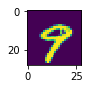

In [4]:
print(y_test[:,9].argmax(axis=0))
plt.figure(figsize=(1,1))
plt.imshow(x_test[:,9].reshape((28,28)))
plt.show()

In [5]:
model = Sequential(lr=1e-2, batch_size=256, epochs=40, loss='cross_entropy')
model.add(Dense(784, 512, activation='relu'))
model.add(Dense(512, 512, activation='relu'))
model.add(Dense(512, 10, activation='softmax'))
model.fit(x_train[:,:3000], y_train[:,:3000])

100%|██████████| 40/40 [03:18<00:00,  4.96s/it]


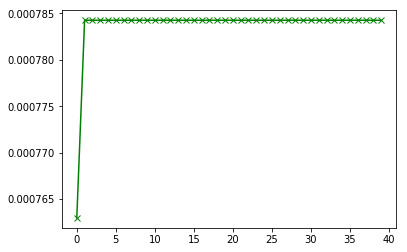

In [7]:
plt.plot(model.history['loss'], 'gx-')
plt.show()

true:  6
pred:  [4]


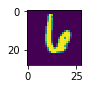

In [8]:
I = 3121

print('true: ', y_test[:,I].argmax(axis=0))
print('pred: ', model(x_test[:,I:I+1]).argmax(axis=0))
plt.figure(figsize=(1,1))
plt.imshow(x_test[:,I].reshape((28,28)))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
yt = y_test.argmax(axis=0)
ypp = model(x_test)
yp = ypp.argmax(axis=0)
print(classification_report(yt, yp))

In [ ]:
model.weights2cpu()